# Main

- This file implement the `utils` and `model` files. it start by loading train datasets, i.e `train_images` (60000, 28, 28, 1) , `train_labels` (60000, 10)
- Model inputs of shape `(28, 28, 1)`
- The optimizer algorithm in the project is `Adam` and loss of `CrossEntropy`
- It train the model on 10 epochs on every 32 shuffled batches.
- It visualize the loss and accuracy against epochs. 
- Then predict the using loaded test datasets and visualize the specified image by the user
- The model Accuracy: `98.78%` and Loss: `0.04159`

In [1]:
# Load modules and dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from utils import *
from model import *


%matplotlib inline    
%load_ext autoreload
%autoreload 2

In [2]:
# Load train_datasets and train_lables
train_images = load_image('datasets/train_dataset/train-images.idx3-ubyte')
train_labels = load_label('datasets/train_dataset/train-labels.idx1-ubyte')
print(f'Train images shape {train_images.shape}')
print(f'Train labels shape {train_labels.shape}')

Train images shape (60000, 28, 28, 1)
Train labels shape (60000, 10)


In [3]:
# Define model params
model = lenet_model((28, 28, 1))

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [4]:
# reshaping into proper form for training
train_label = tf.keras.utils.to_categorical(train_labels, num_classes=10)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_datasets = train_dataset.shuffle(buffer_size=1024).batch(32)

In [5]:
# training model
history = model.fit(train_datasets, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8901 - loss: 0.3858
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9707 - loss: 0.0936
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9811 - loss: 0.0604
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9855 - loss: 0.0463
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9893 - loss: 0.0358
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9911 - loss: 0.0295
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9919 - loss: 0.0254
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9935 - loss: 0.0204
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9943 - loss: 0.0184
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9941 - loss: 0.0179


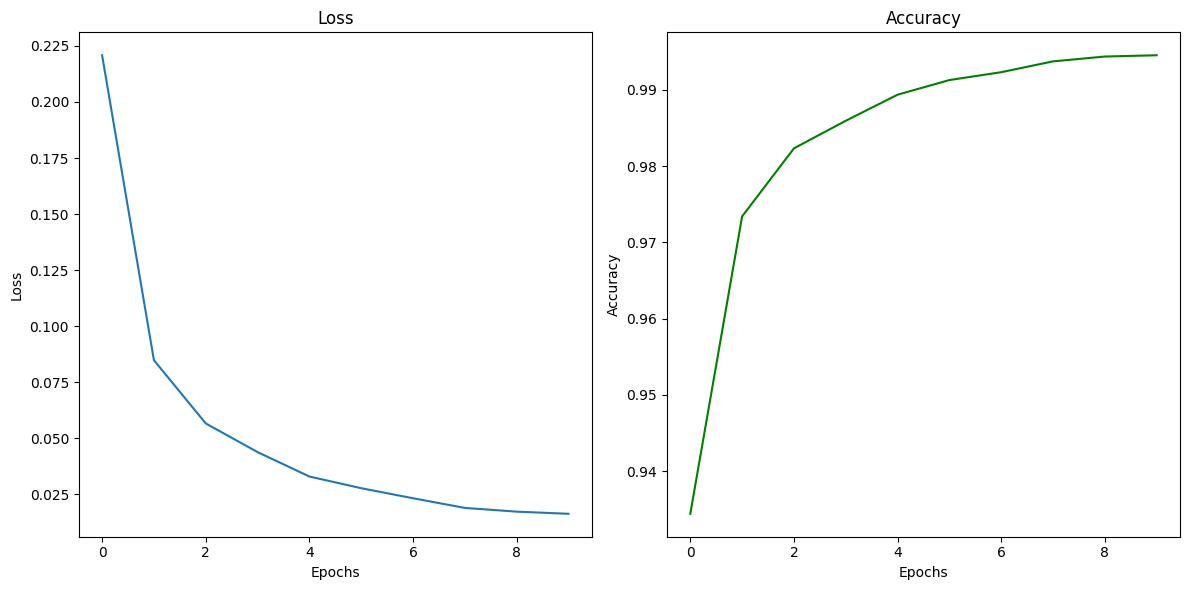

In [7]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc['loss']
df_acc = df_loss_acc['accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting loss
df_loss.plot(ax=ax1, title='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

# Plotting accuracy
df_acc.plot(ax=ax2, title='Accuracy', color='g')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

plt.tight_layout()

In [8]:
# Load test datasets
test_images = load_image('datasets/test_dataset/t10k-images.idx3-ubyte')
test_labels = load_label('datasets/test_dataset/t10k-labels.idx1-ubyte')

In [9]:
# predict the test images
prediction = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Model accuracy: {test_accuracy} \nLoss: {test_loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9809 - loss: 0.0665
Model accuracy: 0.984499990940094 
Loss: 0.05619188770651817


In [11]:
# extract the index of max probability 
pred_class = np.argmax(prediction, axis =1)

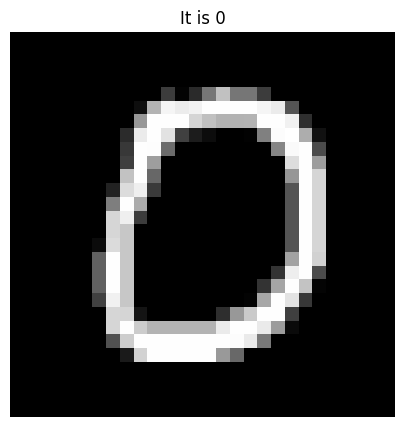

In [12]:
# display image and predicted label from the model
image_show(test_images, pred_class, 10)

# References:
The idea presented from this notebook derived from:-
- [LeCun et al., 1998a] Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998. [follow this link.](https://yann.lecun.com/exdb/publis/index.html)
- THE MNIST DATABASEof handwritten digits as [specified in this link.](https://yann.lecun.com/exdb/mnist/)